In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

## Import Titanic dataset

In [3]:
titanic = pd.read_csv('data/titanic.csv')
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## We hypothesize that mean age of population is less than 35

### H0: pop_mean = 35  
### Ha: pop_mean <35

## Lets take sample of 50 random people and do our study on them

In [5]:
sample_age = titanic['Age'].dropna()
sample_age = sample_age.sample(50,replace=False).values
print(sample_age)

[32.  25.  29.   1.  20.  35.  28.  29.   7.  33.  21.   4.  31.   9.
 26.  17.  48.  28.   6.  35.  26.  32.5 24.  44.  32.  28.  28.  38.
 51.  28.  37.  38.  22.  51.  18.  52.  34.  44.  27.  35.  26.  31.
  1.  20.  24.  65.   2.  36.  19.  40. ]


In [6]:
sample_mean = sample_age.mean()
sample_sd = sample_age.std()
print(sample_mean)
print(sample_sd)

28.35
13.596414968659937


## Testing for Normality using Shapiro_Wilk Test

In [7]:
import scipy.stats as ss

0.9683891534805298
0.1988806575536728
Normal distribution


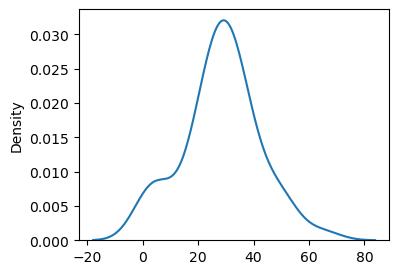

In [8]:
shapiro_stat,shapiro_p = ss.shapiro(sample_age)
print(shapiro_stat)
print(shapiro_p)

if shapiro_p > 0.05:
    print('Normal distribution')
else:
    print('Not a Normal distribution')

plt.figure(figsize=(4,3))
sns.kdeplot(sample_age)
plt.show()

So, for our set of 50 random persons, the age follows a Normal Distribution.  
Hence, we can apply T-Test for testing our hypothesis.

## T-Test

In [9]:
hypothesis_mean = 35
significance_level = .05

t_val, p_val = ss.ttest_1samp(sample_age,hypothesis_mean,alternative= 'less')
print(t_val)
print(p_val)

if p_val > 0.05:
    print('Do not Reject Null')
else:
    print('Reject The Null')

-3.423696622035945
0.0006284452915185583
Reject The Null


In [10]:
titanic['Age'].dropna().mean()

29.69911764705882

## Lets take the sample where ages are greater than equal to 33 and Check what happens

In [23]:
sample_age_high = titanic['Age'].dropna()
sample_age_high = sample_age_high[(sample_age_high>33) & (sample_age_high<60)]
print('Population Mean: ',sample_age_high.mean())
sample_age_high = sample_age_high.sample(50,replace=False).values
print(sample_age_high)

Population Mean:  43.00666666666667
[49.  45.  47.  38.  58.  34.  50.  57.  35.  45.  36.  34.  45.  48.
 42.  36.  47.  36.  35.  40.  34.  45.  40.5 45.  45.  41.  53.  45.
 37.  36.  37.  40.  34.  39.  43.  40.  35.  45.  43.  42.  59.  39.
 40.  35.  38.  40.  35.  50.  47.  44. ]


0.9227975010871887
0.002980493940412998
Not a Normal distribution


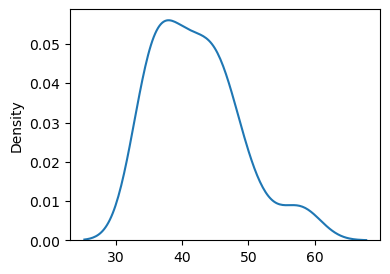

In [24]:
shapiro_stat,shapiro_p = ss.shapiro(sample_age_high)
print(shapiro_stat)
print(shapiro_p)

if shapiro_p > 0.05:
    print('Normal distribution')
else:
    print('Not a Normal distribution')

plt.figure(figsize=(4,3))
sns.kdeplot(sample_age_high)
plt.show()

In [25]:
hypothesis_mean = 35
significance_level = .05

t_val, p_val = ss.ttest_1samp(sample_age_high,hypothesis_mean,alternative= 'less')
print(t_val)
print(p_val)

if p_val > 0.05:
    print('Do not Reject Null')
else:
    print('Reject The Null')

7.7765936439224195
0.999999999789933
Do not Reject Null


## Independent 2 sample T-Test

### Case Study: Mobile vs desktop user engagement

H0: mean_d = mean_m  
H1: mean_d != mean_m

In [26]:
# Data:
nd = 30
xbar_d = 18.5
sd_d = 3.5

nm = 30
xbar_m = 14.3
sd_m = 2.7

In [27]:
# Input the data as lists
desktop_users = [12, 15, 18, 16, 20, 17, 14, 22, 19, 21, 23, 18, 25, 17, 16, 24, 20, 19, 22, 18, 15, 14, 23, 16, 12, 21, 19, 17, 20, 14]
mobile_users = [10, 12, 14, 13, 16, 15, 11, 17, 14, 16, 18, 14, 20, 15, 14, 19, 16, 15, 17, 14, 12, 11, 18, 15, 10, 16, 15, 13, 16, 11]

In [28]:
np.mean(desktop_users)

18.233333333333334

### Check for normality for both group using Shapiro_wilk test

In [29]:
import scipy.stats as ss

In [30]:
print('Desktop group:',ss.shapiro(desktop_users))
print('Mobile group:',ss.shapiro(mobile_users))


Desktop group: ShapiroResult(statistic=0.9783114194869995, pvalue=0.7790969014167786)
Mobile group: ShapiroResult(statistic=0.9714356064796448, pvalue=0.5791608691215515)


So both groups are following normal distribution

## F Test to check Variance Equality

In [31]:
F = np.var(desktop_users)/ np.var(mobile_users)
df_desktop = len(desktop_users) - 1
df_mobile = len(mobile_users) - 1

p_value = ss.f.sf(F,df_desktop,df_mobile)
print(p_value)

0.0598638497708453


Since, pval >.05, variance of both groups are equal

In [32]:
t_2sample = (xbar_d - xbar_m)/np.sqrt((sd_d*sd_d/nd)+(sd_m*sd_m/nm))
print(t_2sample)

dof = nd+nm-2
cdf = 2*ss.t.cdf(-t_2sample,dof) 
# negative taken since we are taken cumulative cdf for both ends
print(cdf)

5.204124024053206
2.6703125767491756e-06


So, we can Reject the Null Hypothesis

## Independent 2 sample Test for male and female population in Titanic

H0: Male and female age are similar  
H1: Male and Female ages are not similar

In [50]:
alpha = 0.05 # level of significance

In [37]:
titanic.groupby('Sex').mean()['Age']

C:\Users\abhid\AppData\Local\Temp\ipykernel_11272\4039389626.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  titanic.groupby('Sex').mean()['Age']


Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [53]:
male_sample = titanic[titanic['Sex']== 'male'].dropna(subset = 'Age').sample(50)
female_sample = titanic[titanic['Sex']== 'female'].dropna(subset = 'Age').sample(50)

### Checking for Normality in both groups

In [54]:
import scipy.stats as ss

In [55]:
m_,male_p = ss.shapiro(male_sample['Age'])
f_,female_p = ss.shapiro(female_sample['Age'])
print(male_p)
print(female_p)

0.38828304409980774
0.10928235948085785


So, both groups have normal distribution of ages here

In [56]:
male_sample = male_sample['Age'].values
female_sample = female_sample['Age'].values

### F Test for checking Variance

In [58]:
F = np.var(male_sample)/ np.var(female_sample)
df_male = len(male_sample) - 1
df_female = len(female_sample) - 1

p_value = ss.f.sf(F,df_male,df_female)
print(p_value)

0.4807998238080707


So, the variances are also not significantly different.

## Apply T-Test

In [59]:
t_stat,p_val = ss.ttest_ind(male_sample,female_sample)
print(t_stat)
print(p_val)

if p_val > 0.05:
    print("Failed to reject the Null. Mean of both groups are similar")
else:
    print("Reject the Null. Significant difference between Ages of Male and Female")

1.0219667843364673
0.3093127989009577
Failed to reject the Null. Mean of both groups are similar


## Paired 2 sample T-Test: Before and After Studies of same group

In [60]:
before = np.array([80, 92, 75, 68, 85, 78, 73, 90, 70, 88, 76, 84, 82, 77, 91])
after = np.array([78, 93, 81, 67, 88, 76, 74, 91, 69, 88, 77, 81, 80, 79, 88])

diff = after - before

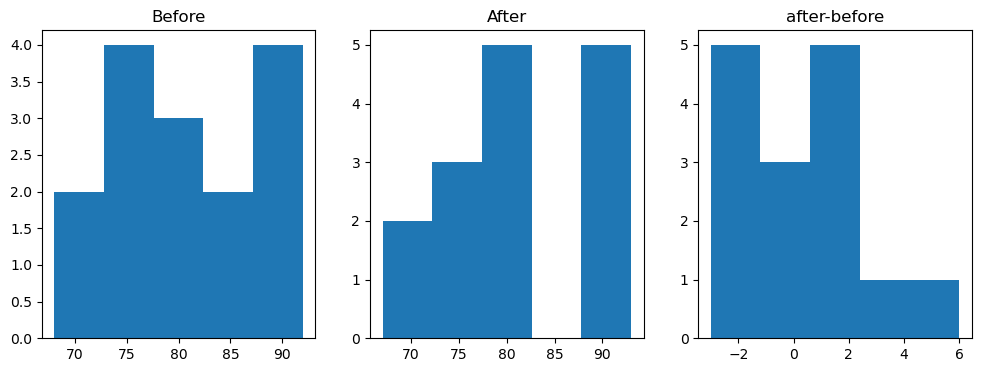

In [67]:
plt.figure(figsize = (12,4))

plt.subplot(1,3,1)
plt.hist(before,bins = 5)
plt.title('Before')

plt.subplot(1,3,2)
plt.hist(after,bins = 5)
plt.title('After')

plt.subplot(1,3,3)
plt.hist(diff,bins = 5)
plt.title('after-before')

plt.show()

In [68]:
ss.shapiro(diff)

ShapiroResult(statistic=0.9220570921897888, pvalue=0.20704729855060577)

Since p>0.05, We can assume normality of difference.

In [75]:
n = len(diff)
dof = n-1

mean_diff = np.mean(diff)
sd_diff = np.std(diff,ddof=1)

t_stat = mean_diff/(sd_diff/np.sqrt(n))
print(t_stat)
p = 2*ss.t.cdf(-t_stat,dof)
print(p)

0.10482848367219182
0.9179989706285087


### Hence we can say that there is no signifant change before and after the intervention